# Computergestützte Mathematik zur Analysis

Vorlesung vom 01.12.2022

&copy; 2022 Prof. Dr. Rüdiger W. Braun 

In [1]:
from sympy import *
init_printing()

# Don't Repeat Yourself! (DRY)

Wenn identische Daten an mehreren Stellen gehalten werden, dann

* hat man unnötige Schreibarbeit geleistet
* besteht Unsicherheit, dass die Daten initial identisch waren
* besteht die Gefahr, dass Updates nicht alle Speicherorte erreichen

# Copy-and-Paste

ist eine Form von DRY.  Die besondere Gefahr ist, dass Änderungen am Input zu Änderungen am Output führen, die eine neuerliche Kopieroperation erorderlich machen, welche aber vergessen wird

Bei der **Klausur** ist copy-and-paste unzulässig.  Wir löschen alle Ausgaben und lassen das Skript laufen.  Eingaben, die sich nur durch Kopieren einer Ausgabe erklären lassen, werden nicht berücksichtigt.

# weitere Integrale

In [2]:
x = Symbol('x')

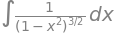

In [3]:
f = 1/(1-x**2)**Rational(3,2)
I1 = Integral(f, x)
I1

In [4]:
F = I1.doit()
F

⎧   -ⅈ⋅x          │ 2│    
⎪───────────  for │x │ > 1
⎪   ________              
⎪  ╱  2                   
⎪╲╱  x  - 1               
⎨                         
⎪     x                   
⎪───────────   otherwise  
⎪   ________              
⎪  ╱      2               
⎩╲╱  1 - x                

In [5]:
F.diff(x).simplify()

⎧     ⅈ                         
⎪───────────  for x > 1 ∨ x < -1
⎪        3/2                    
⎪⎛ 2    ⎞                       
⎪⎝x  - 1⎠                       
⎨                               
⎪     1                         
⎪───────────      otherwise     
⎪        3/2                    
⎪⎛     2⎞                       
⎩⎝1 - x ⎠                       

Nur der zweite Fall interessiert uns

In [6]:
print(F)

Piecewise((-I*x/sqrt(x**2 - 1), Abs(x**2) > 1), (x/sqrt(1 - x**2), True))


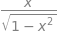

In [7]:
F.subs(Abs(x**2)>1, False)

In [8]:
g = (x-2.4)**2*sqrt(x)*0.1875
g

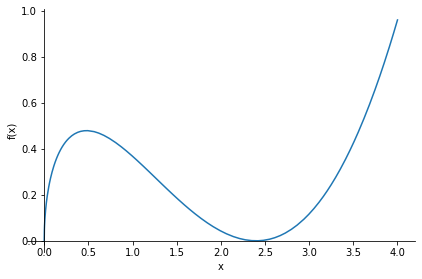

In [10]:
intervall  = (x, 0, 4)
plot(g, intervall);

In [11]:
Integral(g, intervall).doit()

In [12]:
Integral(g, intervall).n()

**Moral**:  Wenn ich symbolisch integrieren will, darf ich keine Fließkommazahlen verwenden

In [15]:
Rational(pi.n())

In [16]:
Rational(0.1875)

In [17]:
g = 3*(x-Rational(12,5))**2*sqrt(x)/16

In [18]:
Integral(g, intervall).doit()

In [19]:
Integral(g, intervall).doit().n()

Ist natürlich trotzdem ein Bug

# Summen 

In [23]:
n, m = symbols('n m')

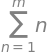

In [24]:
S1 = Sum(n, (n,1,m))
S1

``sum``mit kleinem s ist nicht symbolisch

In [25]:
S1.doit()

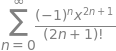

In [26]:
a = (-1)**n * x**(2*n+1) / factorial(2*n+1)
S2 = Sum(a, (n,0,oo))
S2

In [27]:
S2.doit()

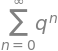

In [28]:
q = S('q')
S3 = Sum(q**n, (n,0,oo))
S3

In [29]:
S3.doit()

⎧   1                 
⎪ ─────    for │q│ < 1
⎪ 1 - q               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    n             
⎪  ╱   q    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪n = 0                
⎩                     

In [30]:
S3.doit().subs(Abs(q)<1, True)

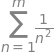

In [31]:
S4 = Sum(1/n**2, (n, 1, m))
S4

In [32]:
S4.doit()

In [33]:
S4.subs(m, oo).doit()

In [34]:
Sum(1/n**54, (n, 1, oo)).doit()

In [35]:
Sum(1/n**3, (n, 1, oo)).doit()

In [36]:
f = zeta(Rational(1,2) + I*x)
f

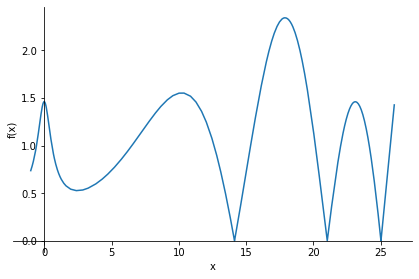

In [37]:
plot(abs(f), (x, -1, 26));

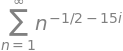

In [38]:
s = Rational(1,2) + 15*I
S5 = Sum(1/n**s, (n, 1, oo))
S5

In [39]:
S5.doit()  # TypeError, die komplexe Reihe divergiert 

TypeError: Invalid comparison of non-real 1/2 + 15*I

# Zeichenketten

Strings

In [40]:
"Text" == 'Text'

True

In [41]:
netto = 2.72
f"Bruttopreis = {netto}€ plus {netto*0.16}€ Mehrwertsteuer"

'Bruttopreis = 2.72€ plus 0.43520000000000003€ Mehrwertsteuer'

In [44]:
f"Bruttopreis = {netto}€ plus {netto*0.16:.2f}€ Mehrwertsteuer"

'Bruttopreis = 2.72€ plus 0.44€ Mehrwertsteuer'

     .2f     (2 Nachkommastellen)
    8.2f     (2 Nachkommastellen, insgesamt 8 Zeichen inkl. eventueller Leerzeichen)

# Polarkoordinaten

In [45]:
r = Symbol('r', positive=True)
phi = Symbol('phi', real=True)
x = r*cos(phi)
y = r*sin(phi)
x, y

In [46]:
r == simplify(sqrt(x**2+y**2))

True

In [47]:
phi == atan(y/x)

False

In [48]:
ers1 = {r:1, phi: pi/3}
x1 = x.subs(ers1)
y1 = y.subs(ers1)
x1, y1

In [49]:
atan(y1/x1)

In [50]:
ers2 = {r:1, phi: 4*pi/3}
x2 = x.subs(ers2)
y2 = y.subs(ers2)
x2, y2

In [51]:
atan(y2/x2)

In [52]:
atan2(y1, x1)

In [53]:
atan2(y2, x2)

# Potenzfunktionen

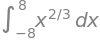

In [54]:
x, y = symbols('x y')
I1 = Integral(x**Rational(2,3), (x,-8,8))
I1

In [55]:
I1.doit()

Das Problem geschickt zurückgespielt &#x1F609;

Was ist $(-8)^\frac23$ ?

In [56]:
(-8)**Rational(2,3)

In [57]:
((-8)**Rational(2,3)).expand(complex=True)

In [58]:
(((-8)**Rational(1,3))**2).expand(complex=True)

In [59]:
((-8)**2)**Rational(1,3)

In [61]:
glg = Eq(x**3, (-8)**2)
solveset(glg, x)

In [62]:
p = exp(log(-8)*Rational(2,3))
p

In [63]:
expand(p, complex=True)

In [64]:
s = Symbol('s')

In [65]:
q = exp(log(-8+I*s)*Rational(2,3))
q

In [66]:
q.limit(s, 0, dir='+')

In [67]:
q.limit(s, 0, dir='+').expand(complex=True)

In [68]:
q.limit(s, 0, dir='-')

In [69]:
q.limit(s, 0, dir='-').expand(complex=True)

Die Funktion $e^{\frac23i\phi}$ ist halt nicht $2\pi$-periodisch

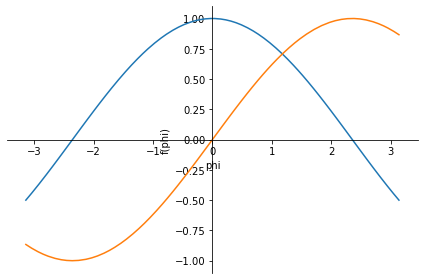

In [70]:
phi = S('phi')
h = exp(2*I*phi/3)
plot(re(h), im(h), (phi, -pi, pi));